## Analysis of CHO and FAT consumption for cycling activities

Short abstract

### Indirect calorimetry as starting point

### Preparation - Import the necessary Python modules

In [12]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

### Setup of basic data & create a diagram
Currently, the data are extracted manually out of the diagram shown above.

In [13]:
# CHO consumption (g/h) vs. power output in watts
xs = np.array([0, 75, 100, 125, 150, 175, 200, 225, 275])
ys = np.array([21, 38, 50, 63, 83, 104, 121, 142, 250])

# FAT consumption (g/h) vs. power output in watts
xs2 = np.array([0, 125, 150, 175, 200, 225, 250, 275])
ys2 = np.array([13, 31, 31, 33, 29, 25, 17, 0])

### Print CHO & FAT consumption as diagram

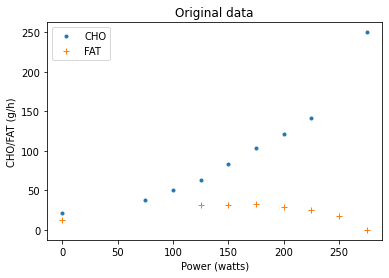

In [14]:
plt.plot(xs, ys, '.', label="CHO")
plt.plot(xs2, ys2, '+', label="FAT")
plt.title("Original data")
plt.xlabel("Power (watts)")
plt.ylabel("CHO/FAT (g/h)")
plt.legend(loc="upper left")

### Define necessary functions for fitting and quality testing

In [15]:
def monoExp(x, m, t, b):
    # CHO consumption is 0 beyond that wattage
    #if x >= 275:
    #    return 0
    return m * np.exp(-t * x) + b

def squareExp(x, a, b, c):
    # CHO consumption is 0 beyond that wattage
    #if x >= 275:
    #    return 0
    return a * np.square(x) + b * x + c

def fitQuality(func, yarray):
    sqDiffs = np.square(yarray - func)
    sqDiffsFromMean = np.square(yarray - np.mean(yarray))
    rSq = 1 - np.sum(sqDiffs) / np.sum(sqDiffsFromMean)
    return rSq

### Perform the fitting of the FAT & CHO functions

In [16]:
# perform the fit
p0 = (1, -0.1, 1)
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params

fit = np.polyfit(xs2, ys2, 2)
a, d, c = fit

### Determine the quality of the fitted curves

In [17]:
# Quality of the CHO curve fit
print(f"CHO fit: R² = {fitQuality(monoExp(xs,m,t,b), ys)}")

CHO fit: R² = 0.9936760064381591


In [18]:
# Quality of the FAT curve fit
print(f"FAT fit: R² = {fitQuality(squareExp(xs2, a,d,c), ys2)}")

FAT fit: R² = 0.9250283256198031


### Plot the fitted curves

Text(0, 0.5, 'CHO/FAT (g/h)')

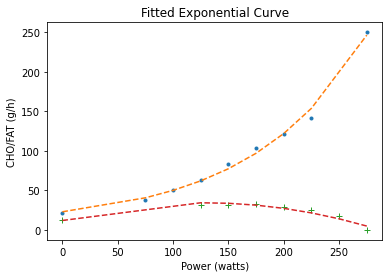

In [19]:
# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.plot(xs2, ys2, '+', label="fatdata")
plt.plot(xs2, squareExp(xs2, a, d, c), '--', label="fat")
plt.title("Fitted Exponential Curve")
plt.xlabel("Power (watts)")
plt.ylabel("CHO/FAT (g/h)")

### Show the fitted functions

In [20]:
# inspect the parameters for CHO function
print(f"Y = {m} * e^({t} * x) + {b}")

Y = 16.4082248903284 * e^(-0.009753356363022837 * x) + 6.514511413977633


In [21]:
# inspect the parameters for FAT function
print(f"Y = {a} * x^2 + {d} * x + {c}")

Y = -0.001365079365079365 * x^2 + 0.34968253968253976 * x + 11.94444444444439


Text(0, 0.5, 'CHO (g/h)')

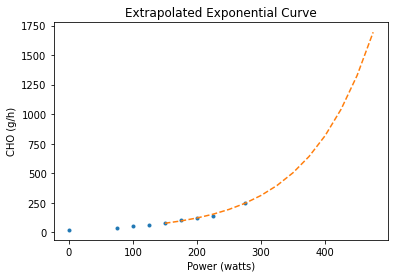

In [22]:
xs2 = np.arange(150,500,25)
ys2 = monoExp(xs2, m, t, b)

plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title("Extrapolated Exponential Curve")
plt.xlabel("Power (watts)")
plt.ylabel("CHO (g/h)")

Use Case: CHO/FAT consumption for a specific wattage

In [23]:
# Specific wattage
wattage = 178

# Calculate and print the CHO/FAT consumption in g/h
print(f"Wattage {wattage}: CHO consumption: {round(monoExp(wattage,m,t,b),0)}g/h - FAT consumption: {round(squareExp(wattage, a,d,c),0)}g/h")

Wattage 178: CHO consumption: 100.0g/h - FAT consumption: 31.0g/h


Use Case: CHO/FAT consumption for a specific wattage and duration (in hours)

In [24]:
# Specific wattage
wattage = 100

# duration in hours
duration = 2

# Calculate and print the CHO/FAT consumption in g/h
cho = duration * round(monoExp(wattage,m,t,b),0)
fat = duration * round(squareExp(wattage, a,d,c),0)

# Total calories
total_cal = 4*cho + 9*fat

print(f"Consumption for {duration}h at {wattage} watts\nCHO: {cho}g - FAT: {fat}g\nCalories: {cho*4} {fat*9}\nTotal calories: {total_cal}")

Consumption for 2h at 100 watts
CHO: 100.0g - FAT: 66.0g
Calories: 400.0 594.0
Total calories: 994.0


Use Case: Target CHO consumption

In [25]:
# target CHO consumption in g/h
target_cho = 350

# estimated duration of activity
target_duration = 3
cho_h = target_cho / target_duration
x = round((np.log((cho_h-b)/m)) / -t, 0)

print(f"Target intensity = {x} watts for {target_duration} hours")

Target intensity = 195.0 watts for 3 hours


In [33]:
import sympy as sy

x = sy.symbols('x')
function = a * x**2 + d * x + c
#function2 = sy.S(function)


function_diff1 = sy.diff(function, x, 1)

extremes = sy.solve(sy.Eq(function_diff1, 0))
x_0 = extremes[0]
y_0 = squareExp(x_0, a, d, c)
#y_0 = function2.subs(x, x_0)
#print(extremes)

print(f"Max FAT consumotion = {x_0} watts , {y_0} g/h FAT")

Max FAT consumotion = 128.081395348837 watts , 34.3383582502768 g/h FAT


In [ ]:
# CHO consumption for an activity as accumulated graph to see impact of surges
# FAT consumption (absolut / percentage)
# Determination of highest FAT consumption in watts

# Analyse existing data files

# Analyse information out of the function itself
